In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
df = pd.read_csv('medical_cost.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [11]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [12]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


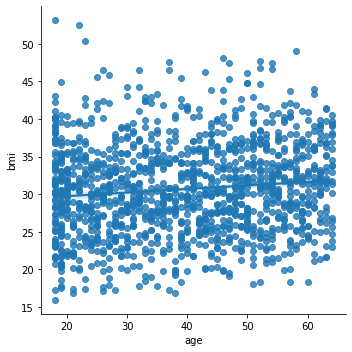

In [14]:
sns.lmplot(x='age', y='bmi', data=df)

In [20]:
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


In [21]:
from sklearn.preprocessing import OrdinalEncoder

df_copy = df.copy()
ordinal_encoder = OrdinalEncoder()
df_copy[['sex', 'smoker', 'region']] = ordinal_encoder.fit_transform(df_copy[['sex', 'smoker', 'region']])


In [22]:
df_copy.head(20)

,age,sex,bmi,children,smoker,region,charges
0,19,0.0,27.900,0,1.0,3.0,16884.92400
1,18,1.0,33.770,1,0.0,2.0,1725.55230
2,28,1.0,33.000,3,0.0,2.0,4449.46200
3,33,1.0,22.705,0,0.0,1.0,21984.47061
4,32,1.0,28.880,0,0.0,1.0,3866.85520
5,31,0.0,25.740,0,0.0,2.0,3756.62160
6,46,0.0,33.440,1,0.0,2.0,8240.58960
7,37,0.0,27.740,3,0.0,1.0,7281.50560
8,37,1.0,29.830,2,0.0,0.0,6406.41070
9,60,0.0,25.840,0,0.0,1.0,28923.13692


<AxesSubplot:>

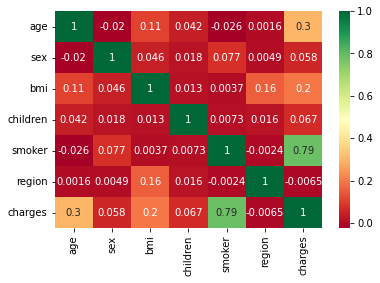

In [25]:
#liczenie korelacji między zmiennymi
count_corr=df_copy.corr()

#heatmapa
sns.heatmap(count_corr, cmap= 'RdYlGn',annot=True)

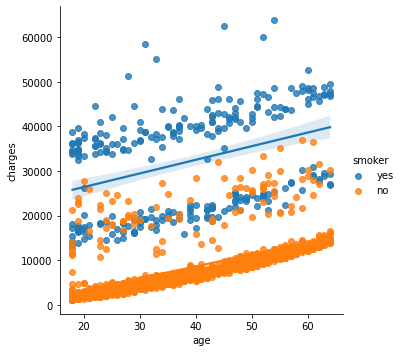

In [30]:
sns.lmplot(x='age', y='charges', data=df, hue='smoker')

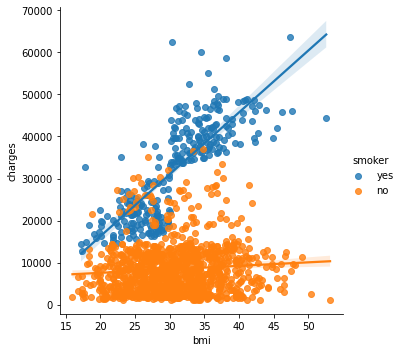

In [33]:
sns.lmplot(x='bmi', y='charges', data=df, hue='smoker')

In [38]:
df_copy = df_copy[df_copy['charges'] < 50000]
df_copy1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1330 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1330 non-null   int64  
 1   sex       1330 non-null   float64
 2   bmi       1330 non-null   float64
 3   children  1330 non-null   int64  
 4   smoker    1330 non-null   float64
 5   region    1330 non-null   float64
 6   charges   1330 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 83.1 KB


In [34]:
X = df_copy.iloc[:, :-1].values
y = df_copy['charges'].values

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)

In [35]:
#regresja liniowa
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

slr = LinearRegression()

slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

MSE_lr_train = mean_squared_error(y_train, y_train_pred)
MSE_lr_test = mean_squared_error(y_test, y_test_pred)
r2_lr_train = r2_score(y_train, y_train_pred)
r2_lr_test = r2_score(y_test, y_test_pred)

print('MSE na próbkach uczących: %.3f, testowych: %.3f' % (
        MSE_lr_train,
        MSE_lr_test))

print('Współczynnik R^2 dla danych uczących: %.3f, testowych: %.3f' % (
        r2_lr_train,
        r2_lr_test ))

MSE na próbkach uczących: 35403275.585, testowych: 41607776.511
Współczynnik R^2 dla danych uczących: 0.749, testowych: 0.753


In [36]:
#drzewo decyzyjne
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

tree_reg = DecisionTreeRegressor(max_depth=3, random_state=42)
tree_reg.fit(X_train, y_train)
y_train_pred = tree_reg.predict(X_train)
y_test_pred = tree_reg.predict(X_test)

MSE_t_train = mean_squared_error(y_train, y_train_pred)
MSE_t_test = mean_squared_error(y_test, y_test_pred)
r2_t_train = r2_score(y_train, y_train_pred)
r2_t_test = r2_score(y_test, y_test_pred)

print('MSE na próbkach uczących: %.3f, testowych: %.3f' % (
        MSE_t_train,
        MSE_t_test))

print('Współczynnik R^2 dla danych uczących: %.3f, testowych: %.3f' % (
        r2_t_train,
        r2_t_test ))

MSE na próbkach uczących: 19506883.013, testowych: 28506043.852
Współczynnik R^2 dla danych uczących: 0.862, testowych: 0.831
